In [1]:
# Importing Libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import numpy as np

In [2]:
# Reading Dataset
df = pd.read_csv('../../data/XAUUSD_2010-2023.csv').head(100_0)

In [3]:
# Dataset Overview
df

,time,open,high,low,close,rsi14,sma14
0,2010-01-03 18:00:00,1098.45,1100.00,1098.05,1099.95,81.98,1096.38
1,2010-01-03 18:05:00,1100.00,1100.30,1099.45,1099.75,79.17,1096.72
2,2010-01-03 18:10:00,1099.70,1100.10,1099.30,1099.45,75.02,1097.03
3,2010-01-03 18:15:00,1099.50,1099.60,1098.50,1099.45,75.02,1097.30
4,2010-01-03 18:20:00,1099.40,1099.60,1098.90,1098.90,67.50,1097.50
...,...,...,...,...,...,...,...
995,2010-01-07 06:40:00,1131.73,1131.85,1130.70,1131.05,47.60,1131.43
996,2010-01-07 06:45:00,1131.03,1131.05,1129.95,1130.05,42.59,1131.39
997,2010-01-07 06:50:00,1130.28,1130.55,1130.05,1130.25,43.86,1131.34
998,2010-01-07 06:55:00,1130.23,1130.45,1130.05,1130.10,43.09,1131.33


kita dapat melihat di dalam dataset tersebut mengandung beberapa informasi harian seperti, Open, High, Low, Close, sepanjang volume transaksi per hari

In [4]:
# Dataset Basic Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    1000 non-null   object 
 1   open    1000 non-null   float64
 2   high    1000 non-null   float64
 3   low     1000 non-null   float64
 4   close   1000 non-null   float64
 5   rsi14   1000 non-null   float64
 6   sma14   1000 non-null   float64
dtypes: float64(6), object(1)
memory usage: 54.8+ KB


In [5]:
 # Data Preparation
# kite tidak membutuhkan data rsi14 dan sma14 dalam data pediksi ini, maka kita akan menghapus data setsebut 
df.drop(['sma14', 'rsi14'], axis=1, inplace=True)

# Transforming Data
  pada data time tersebut mengandung type data objek. asumsinya kita akan mengubah data tersebut untuk mempercepat calkulasi. maka kita akan mengkonversikan menjadi datetime dan mengurukan dari nilai terkecil 

In [8]:
df['Date'] = pd.to_datetime(df['time'])
df['Date']

0     2010-01-03 18:00:00
1     2010-01-03 18:05:00
2     2010-01-03 18:10:00
3     2010-01-03 18:15:00
4     2010-01-03 18:20:00
              ...        
995   2010-01-07 06:40:00
996   2010-01-07 06:45:00
997   2010-01-07 06:50:00
998   2010-01-07 06:55:00
999   2010-01-07 07:00:00
Name: Date, Length: 1000, dtype: datetime64[ns]

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   time    1000 non-null   object        
 1   open    1000 non-null   float64       
 2   high    1000 non-null   float64       
 3   low     1000 non-null   float64       
 4   close   1000 non-null   float64       
 5   Date    1000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 47.0+ KB


In [10]:
df.sort_values(by='Date', ascending=True, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.head()

,time,open,high,low,close,Date
0,2010-01-03 18:00:00,1098.45,1100.0,1098.05,1099.95,2010-01-03 18:00:00
1,2010-01-03 18:05:00,1100.00,1100.3,1099.45,1099.75,2010-01-03 18:05:00
2,2010-01-03 18:10:00,1099.70,1100.1,1099.30,1099.45,2010-01-03 18:10:00
3,2010-01-03 18:15:00,1099.50,1099.6,1098.50,1099.45,2010-01-03 18:15:00
4,2010-01-03 18:20:00,1099.40,1099.6,1098.90,1098.90,2010-01-03 18:20:00


In [12]:
# Checking Duplicates
df.duplicated().sum()

0

In [13]:
# Checking Missing Values
df.isnull().sum().sum()

0

In [14]:
# Preprocess the data
df = df.dropna()  # Handle missing values

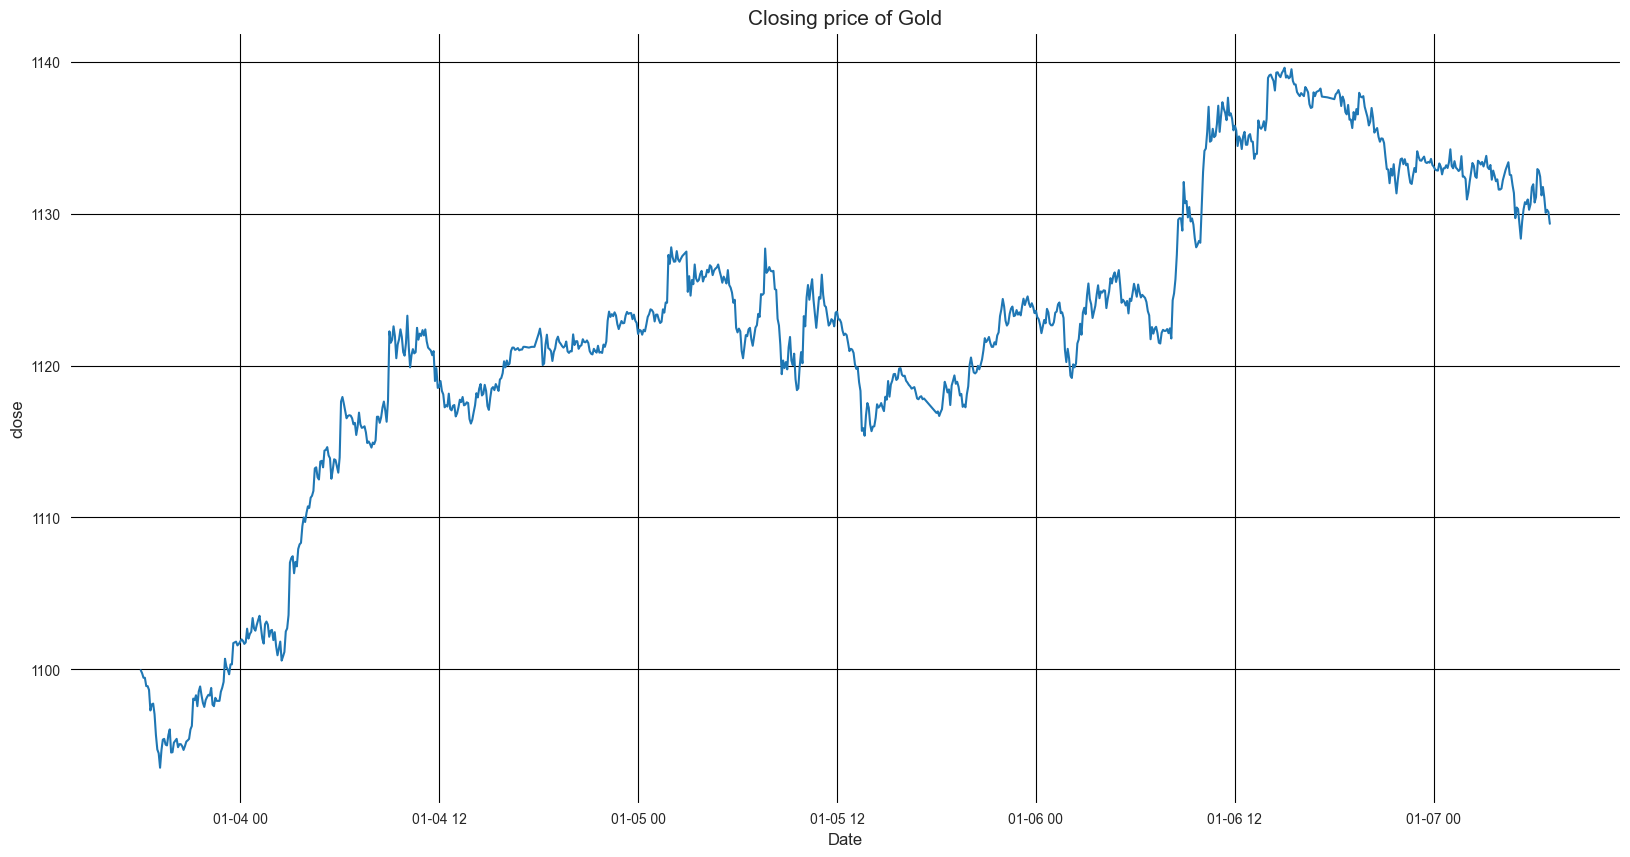

In [25]:
plt.figure(figsize=(20, 10))
fig = sns.lineplot(y=df['close'], x=df['Date'])
plt.title('Closing price of Gold', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('close', fontsize=12)
plt.grid(color='black')
plt.show()

AttributeError: 'Series' object has no attribute 'day'

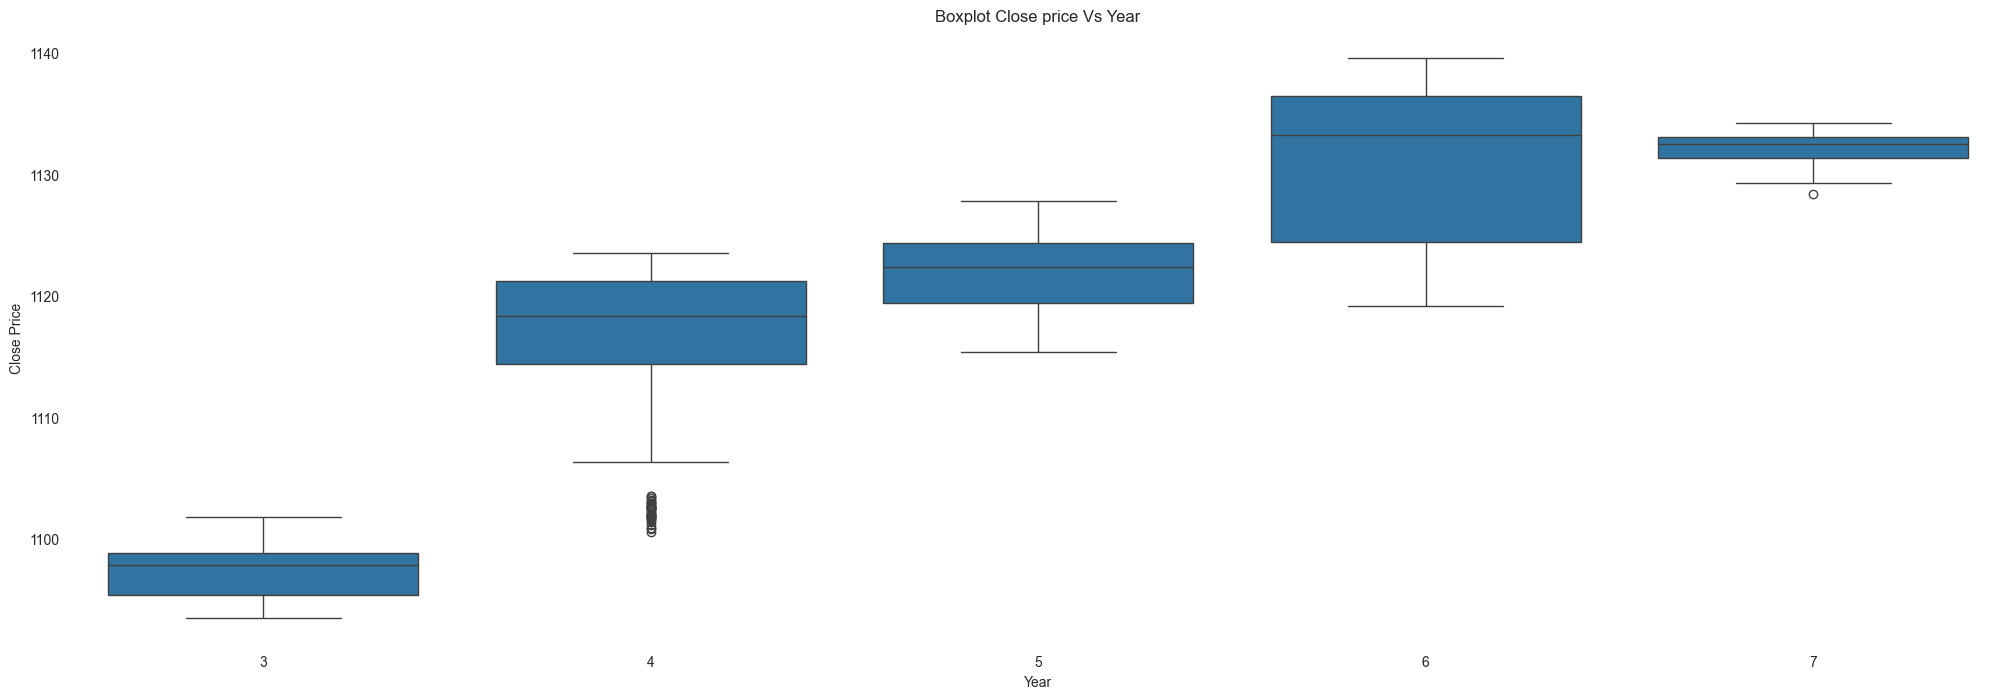

In [63]:

# Close price Vs Year
_, ax = plt.subplots(figsize=(25, 8))
sns.boxplot(x=df['Date'].dt.day, y=df['close'], ax=ax)
plt.title('Boxplot Close price Vs Year')
plt.xlabel('Year')
plt.ylabel('Close Price')
plt.grid()

In [61]:
#Yearly Coefficient of Variation of Close Prices in percentage
df_1=(df.groupby(df['Date'].dt.day)
      .mean()
      .rename(columns={'Close':'Mean'}))

TypeError: agg function failed [how->mean,dtype->object]

In [56]:

#Yearly Coefficient of Variation of Close Prices in percentage
df_1 = df.groupby(df['Date'].dt.day).mean().rename(columns={'close': 'Mean'})
df_1

TypeError: agg function failed [how->mean,dtype->object]

In [50]:

df_1 = df_1.merge(
    df.groupby(df['Date'].dt.day)
    .std()
    .rename(columns={'close': 'Std'}),
    left_index=True,
    right_index=True)

df_1['Cov_pct'] = ((df_1["Std"] / df_1["Mean"]) * 100).round(2)
df_1

# the coefficient of variation tells you how much variation there is in relation to the mean. It's a way to understand the relative variability within a dataset.

TypeError: agg function failed [how->mean,dtype->object]

In [16]:
test_size = df[df.Date.dt.day == 5].shape[0]
test_size

280

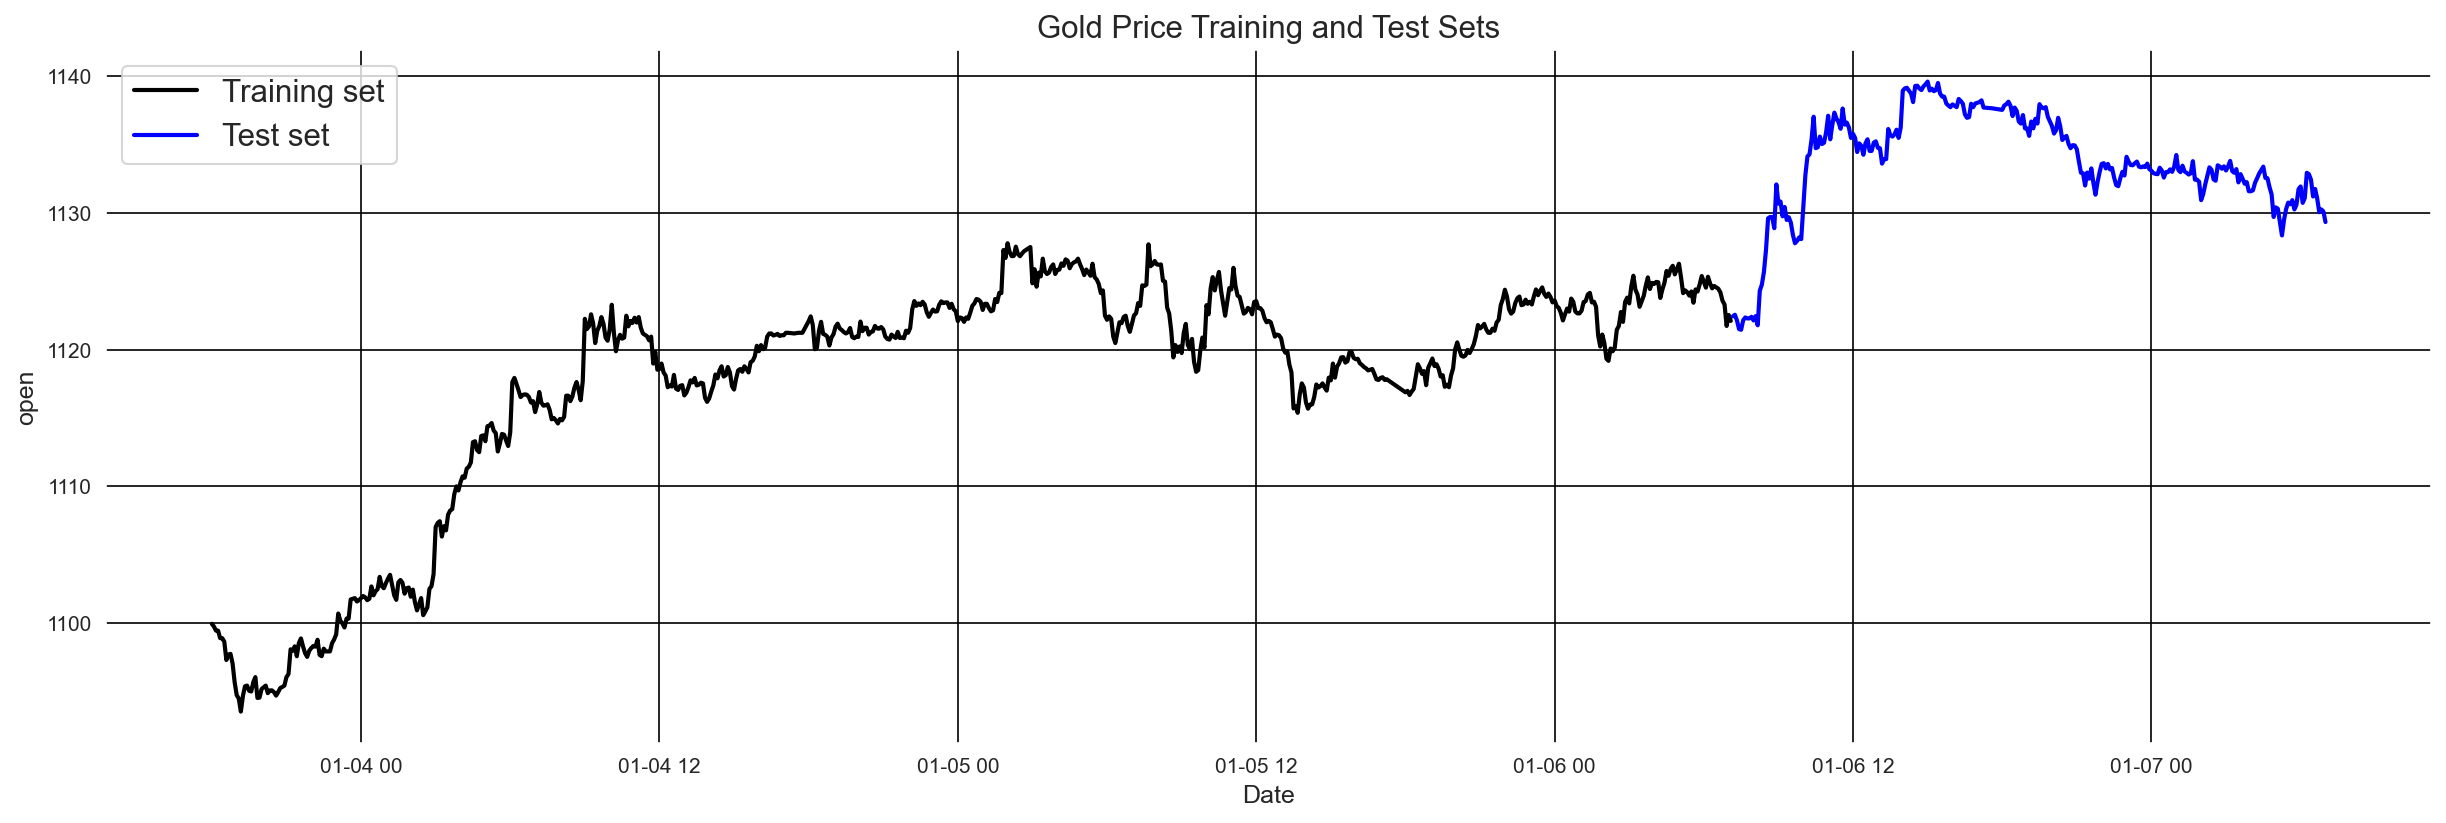

In [23]:
# Gold Price Training and Test Sets Plot
plt.figure(figsize=(20, 6), dpi=150)
plt.rcParams['axes.facecolor'] = 'white'
plt.rc('axes', edgecolor='white')

plt.plot(
    df.Date[:-test_size],
    df['close'][:-test_size],
    color='black',
    lw=2)

plt.plot(
    df.Date[-test_size:],
    df['close'][-test_size:],
    color='blue',
    lw=2)

plt.title('Gold Price Training and Test Sets', fontsize=15)
plt.xlabel('Date', fontsize=12)
plt.ylabel('open', fontsize=12)
plt.legend(['Training set', 'Test set'], loc='upper left', prop={'size': 15})
plt.grid(color='black')
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'Date'

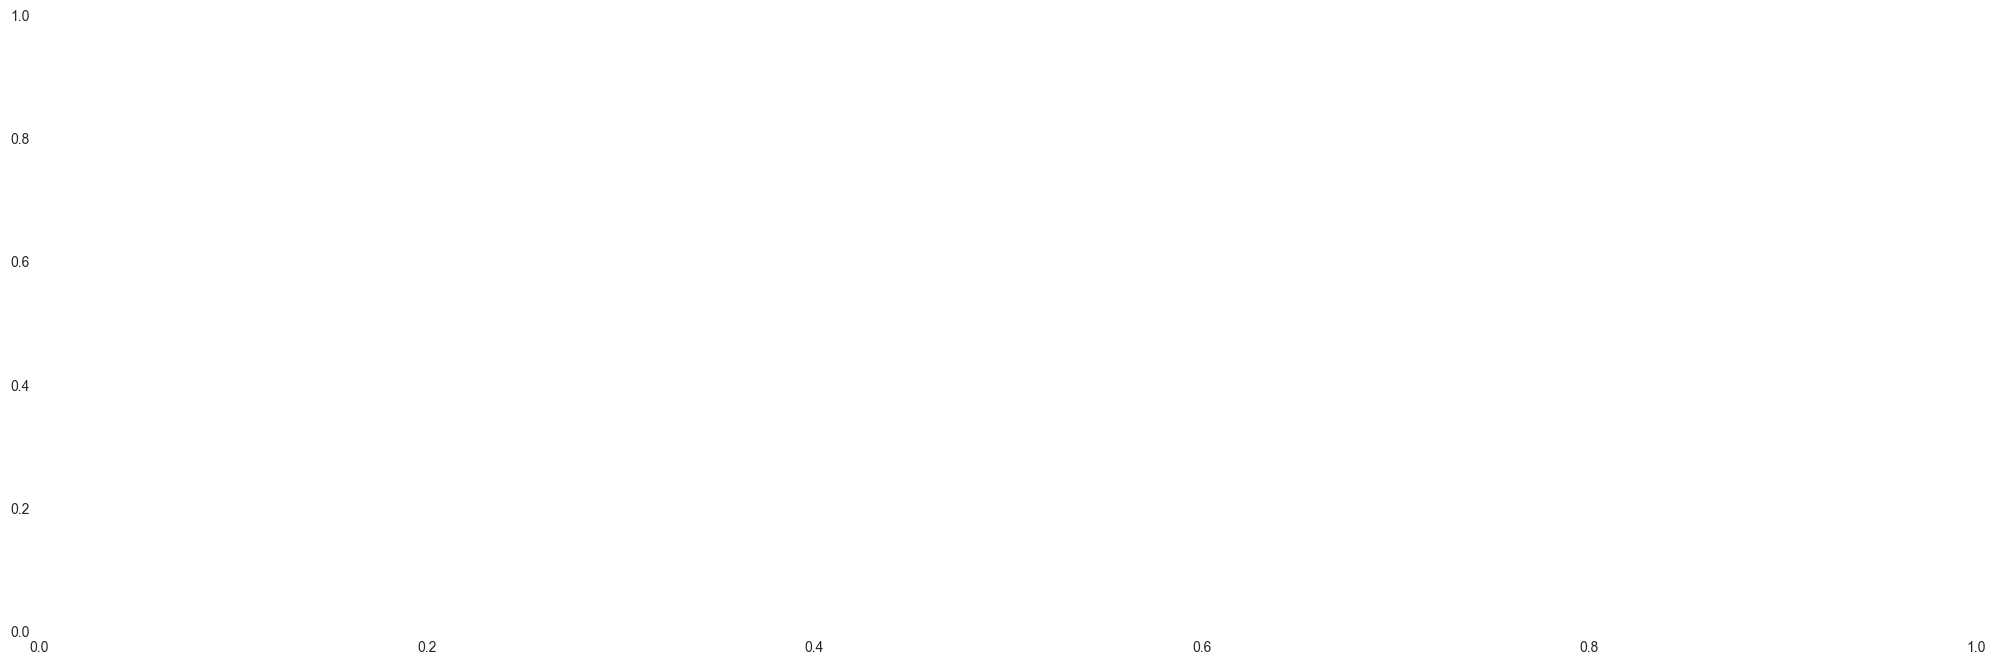

# Data Scaling
Since we aim to predict Price only based on its historical data, we scale Price using MinMaxScaler to avoid intensive computations

In [18]:
# Normalize the data
features = ['open', 'high', 'low']

In [19]:
# scaler = StandardScaler()
# X_scaled  = scaler.fit_transform(df[features])
# y = df['close']


In [20]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df[features],
    df['close'],
    test_size=0.2,
    random_state=42)

In [21]:
print('X_train Shape: ', X_train.shape)
print('y_train Shape: ', y_train.shape)
print('X_test Shape:  ', X_test.shape)
print('y_test Shape:  ', y_test.shape)

X_train Shape:  (800, 3)
y_train Shape:  (800,)
X_test Shape:   (200, 3)
y_test Shape:   (200,)


In [64]:
x = df.drop(columns=['close','time','Date'],axis=1)
y = df['close']

In [ ]:

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:

lr = LinearRegression()
lr.fit(x_train_scaled,y_train)
y_preds_lr = lr.predict(x_test_scaled)
print('MAE: ',mean_absolute_error(y_test,y_preds_lr))
print('MSE: ',mean_squared_error(y_test,y_preds_lr))
print('R2Score: ',r2_score(y_test,y_preds_lr)*100)

MAE:  0.21066547804559946
MSE:  0.07862901730393035
R2Score:  99.92343753133768


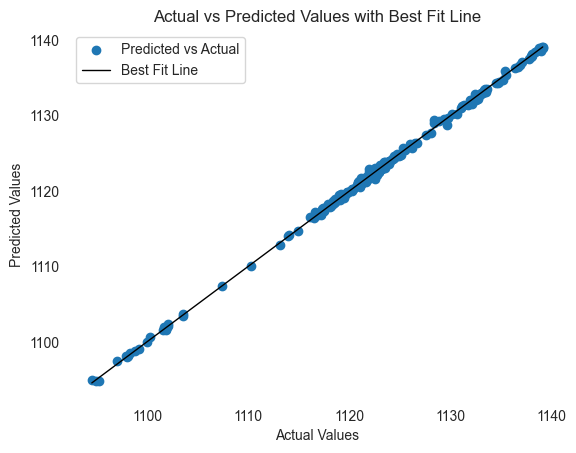

In [70]:
plt.scatter(y_test, y_preds_lr, label='Predicted vs Actual')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='black', linewidth=1, label='Best Fit Line')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values with Best Fit Line')
plt.legend()
plt.show()

In [124]:

# # Create the classification model
# model = RandomForestClassifier(n_estimators=100, random_state=42)
# # Train the model
# model.fit(X_train, y_train)

ValueError: Found array with dim 3. RandomForestClassifier expected <= 2.

In [22]:
# Create the classification model
model = LogisticRegression()
# Train the model
model.fit(X_train, y_train)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [22]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.3f}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.845
Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200

Confusion Matrix:
[[169   0]
 [ 31   0]]


C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Confusion Matrix:
[[169   0]
 [ 31   0]]

Classification Report:
              precision    recall  f1-score   support

           0       0.84      1.00      0.92       169
           1       0.00      0.00      0.00        31

    accuracy                           0.84       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.71      0.84      0.77       200


Accuracy Score:
0.845


C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\laragon\bin\python\python-3.10\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


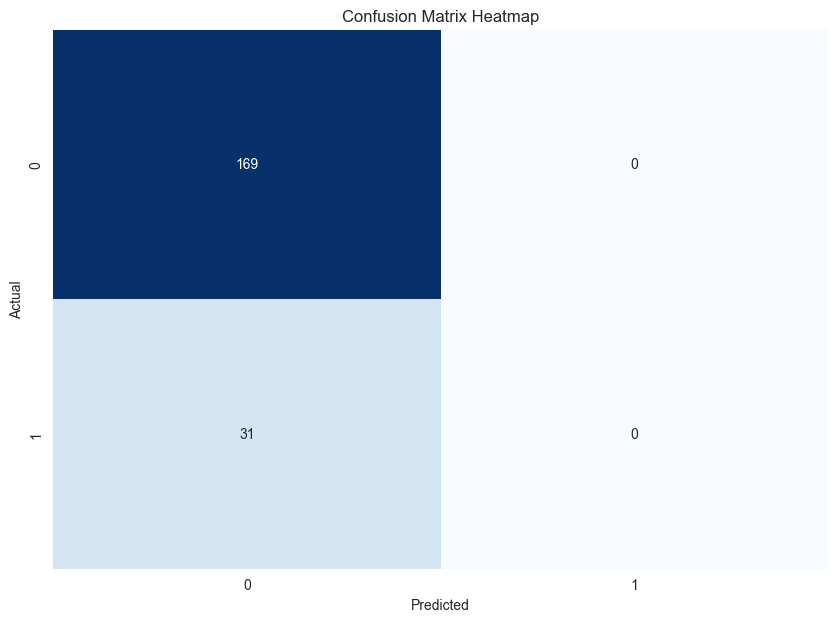

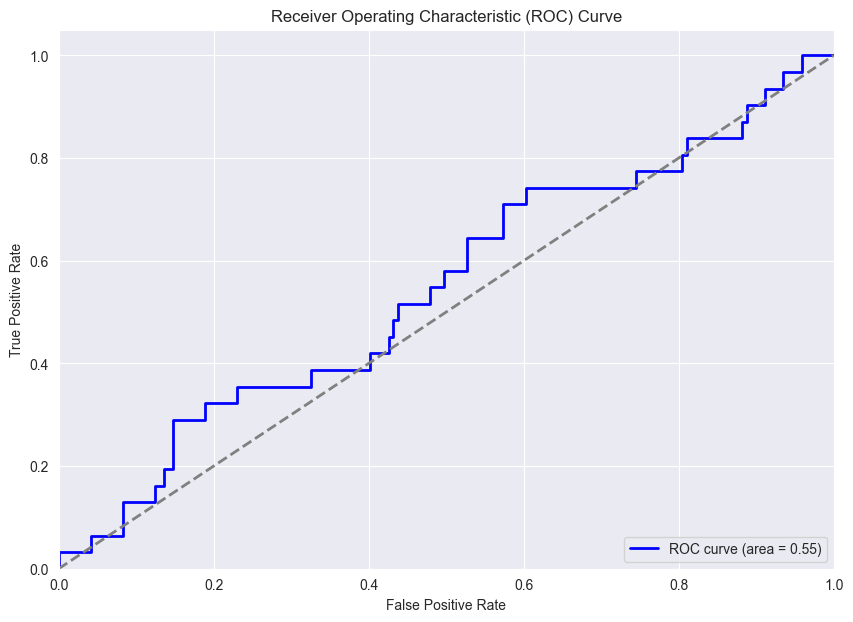

In [300]:

# Evaluate the model's performance
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

# Visualize the classifier's performance
# Confusion Matrix Heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

# ROC Curve
y_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()